# 🚢 Titanic Dataset: Data Cleaning and Preprocessing
**Lab 02 – ML Data Ingestion, Missing Values & Outliers**
- Prepared by: PRITHVI SINGH GULIA
- Course: 23/CS/316

In [19]:
# ===================== Imports & Load Data =====================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='ticks', font_scale=1.1)
%matplotlib inline

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")
original_shape = df.shape
print(f"Data loaded: Shape = {original_shape}")


Data loaded: Shape = (891, 12)


## 1️⃣ Exploratory Data Analysis (EDA)
- Inspect data structure with `.info()` and `.describe()`
- Identify numeric vs categorical features
- Visualize correlations and distributions


In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:

print("INFO():\n")
print(df.info())

print("\nDESCRIBE():\n")
display(df.describe(include='all').T)


INFO():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PassengerId           891 non-null    int64  
 1   Survived              891 non-null    int64  
 2   Pclass                891 non-null    int64  
 3   Name                  891 non-null    object 
 4   Sex                   891 non-null    object 
 5   Age                   891 non-null    float64
 6   SibSp                 891 non-null    int64  
 7   Parch                 891 non-null    int64  
 8   Ticket                891 non-null    object 
 9   Fare                  891 non-null    float64
 10  Cabin                 891 non-null    object 
 11  Embarked              891 non-null    object 
 12  Age_MissingFlag       891 non-null    int64  
 13  Cabin_MissingFlag     891 non-null    int64  
 14  Embarked_MissingFlag  891 non-null    int64  
 15  Deck          

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,891.0,NaN,NaN,NaN,29.112424,13.304424,0.42,21.5,26.0,36.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,24.046813,20.481625,0.0,7.9104,14.4542,31.0,65.6344


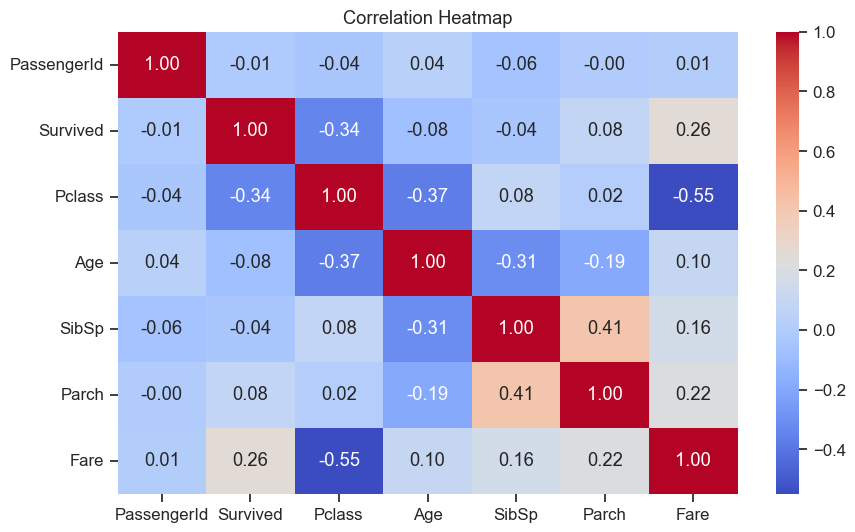

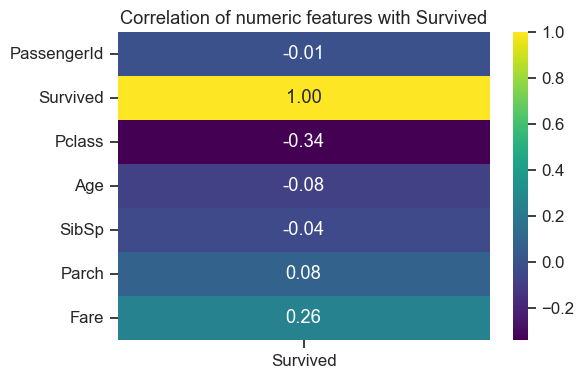

In [21]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Correlation with target
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True)[['Survived']], annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation of numeric features with Survived")
plt.show()


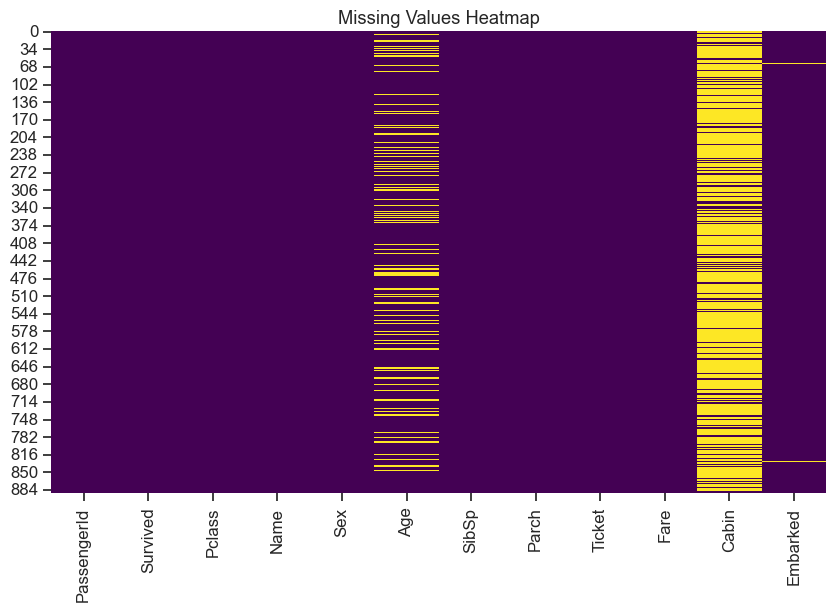

In [10]:
# Cell 4 — Visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


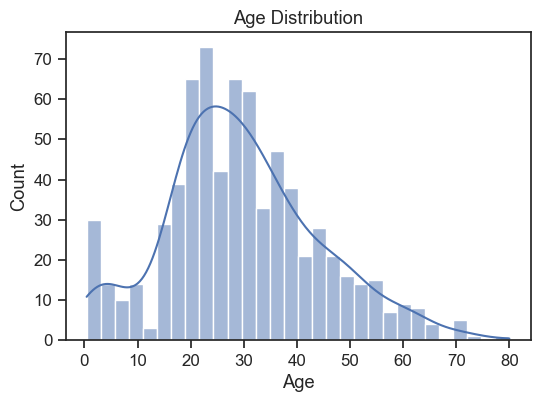

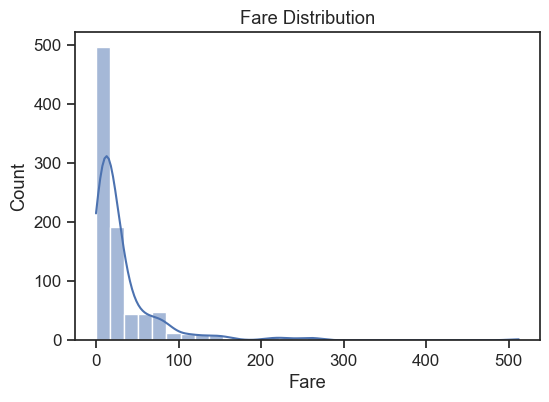

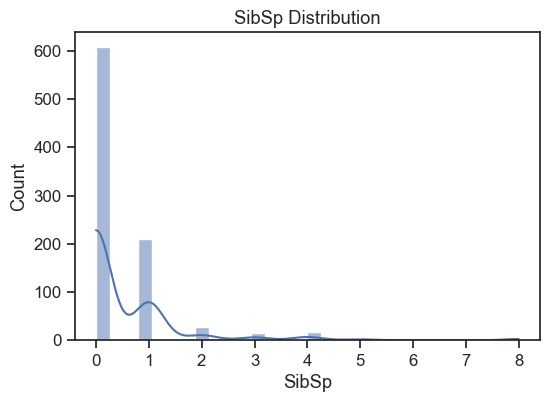

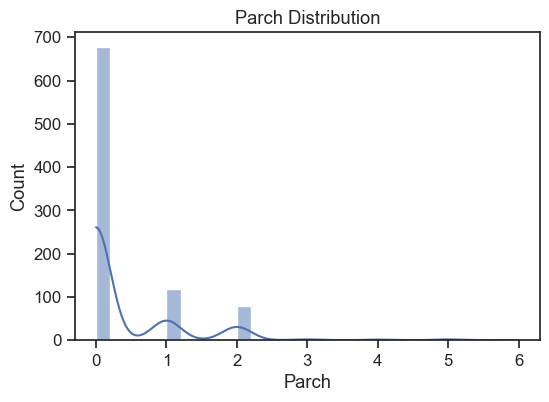

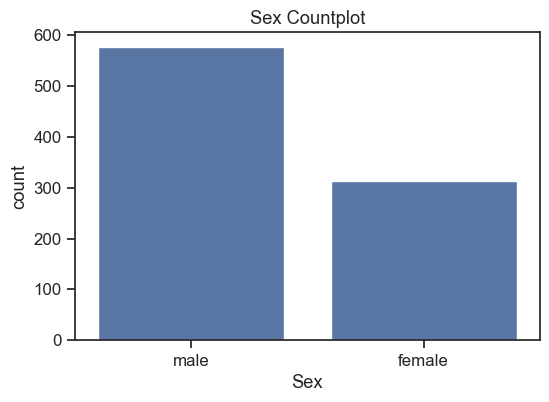

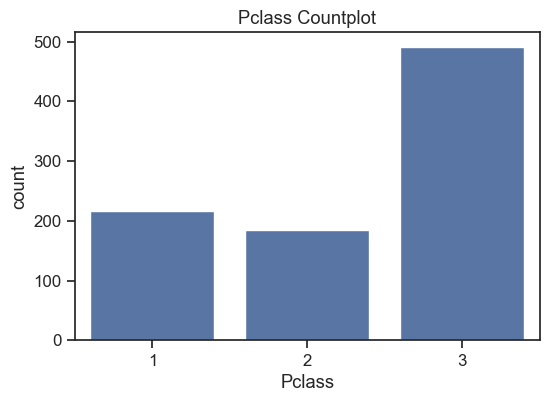

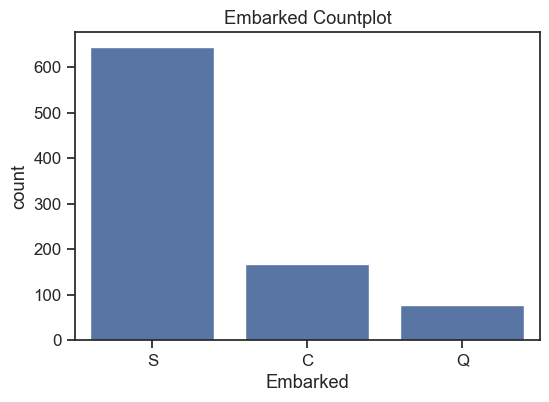

In [22]:
# Numeric distributions
numeric_features = ['Age','Fare','SibSp','Parch']
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

# Categorical counts
categorical_features = ['Sex','Pclass','Embarked']
for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Countplot")
    plt.show()


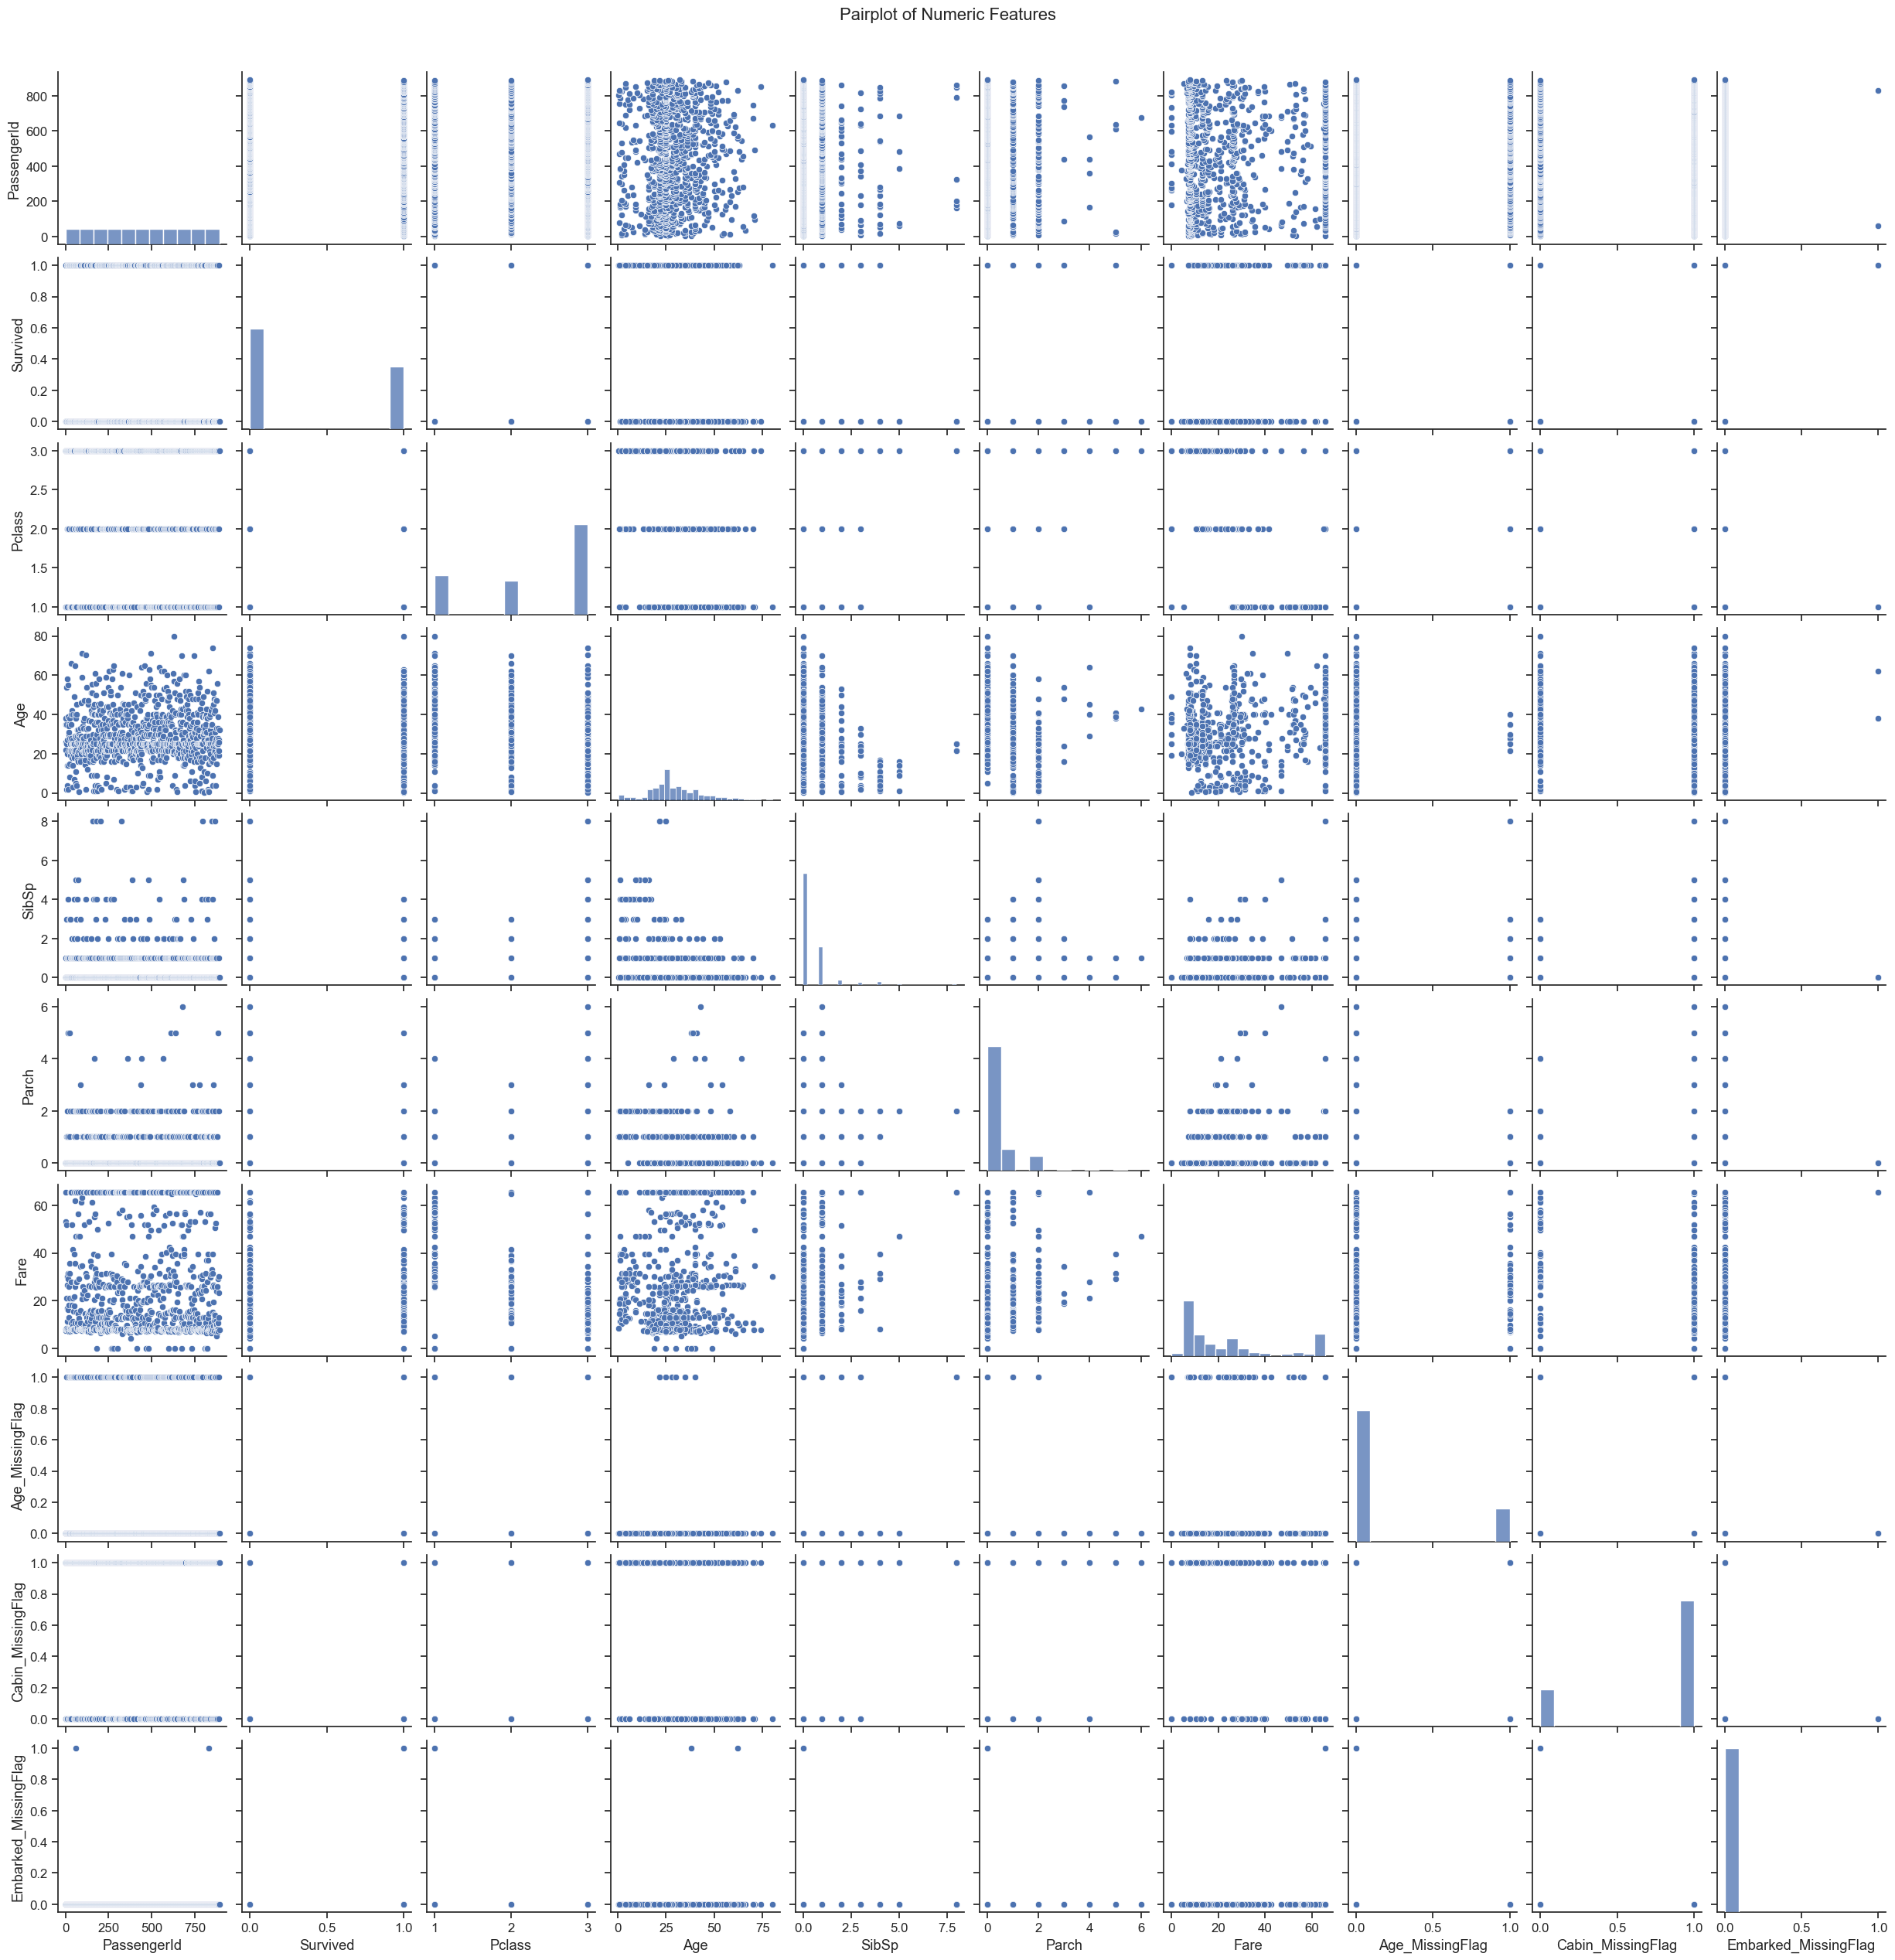

In [32]:

sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()


## 2️⃣ Missing Value Analysis
- Identify columns with missing values
- Create missing flags for reproducibility


In [13]:
# Cell 6 — Missing value counts
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)


Missing values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [23]:
# Missing values
missing = df.isnull().sum()
print("\nColumns with missing values:\n", missing[missing>0])

# Function to create missing flags
def create_missing_flags(df):
    for col in df.columns[df.isnull().any()]:
        df[col + "_MissingFlag"] = df[col].isnull().astype(int)
    return df

df = create_missing_flags(df)



Columns with missing values:
 Age         177
Cabin       687
Embarked      2
dtype: int64


## 3️⃣ Missing Value Imputation
- Numeric: Median (Age by Pclass + Sex)
- Categorical: Mode or 'Unknown' (Cabin)


In [26]:
# Age: median per Pclass + Sex using transform
df['Age'] = df.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Embarked: mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Cabin: fill missing and extract deck
df['Deck'] = df['Cabin'].str[0].fillna('U')  # U = Unknown
df['Cabin'] = df['Cabin'].fillna('Unknown')

# Confirm missing handled
print("\nMissing values after imputation:\n", df.isnull().sum())




Missing values after imputation:
 PassengerId             0
Survived                0
Pclass                  0
Name                    0
Sex                     0
Age                     0
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                   0
Embarked                0
Age_MissingFlag         0
Cabin_MissingFlag       0
Embarked_MissingFlag    0
Deck                    0
dtype: int64


## 4️⃣ Outlier Handling
- Column: Fare
- Method: IQR capping
- Visualize before and after capping


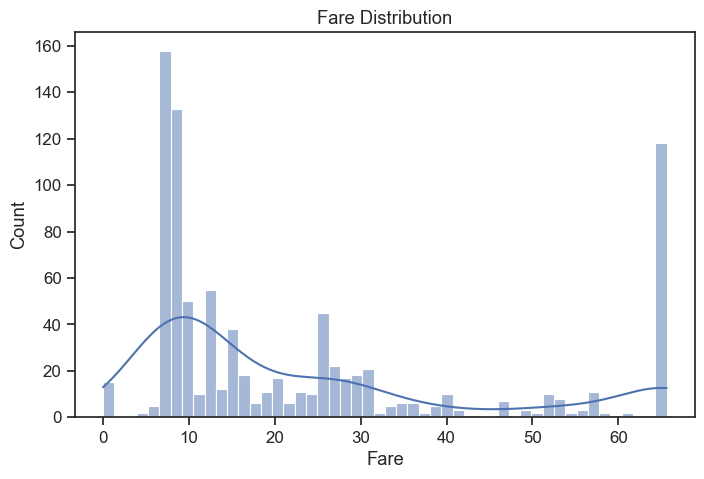

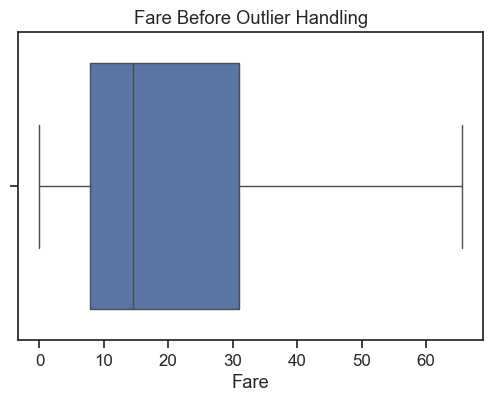

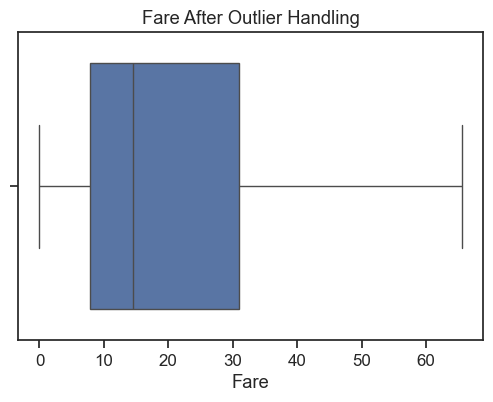

In [28]:
# Visualize Fare distribution before outlier treatment
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], bins=50, kde=True)
plt.title('Fare Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'])
plt.title("Fare Before Outlier Handling")
plt.show()

# Outlier handling using IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR

# Cap outliers
df['Fare'] = np.where(df['Fare'] > upperBound, upperBound,
                      np.where(df['Fare'] < lowerBound, lowerBound, df['Fare']))

# Visualize after capping
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'])
plt.title("Fare After Outlier Handling")
plt.show()


## 5️⃣ Cabin Deck Extraction
- Extract first letter of Cabin to represent deck
- Fill missing Cabin with 'Unknown', unknown decks as 'U'


In [29]:
# Extract Deck from Cabin
df['Deck'] = df['Cabin'].str[0].fillna('U')  # U = Unknown
df['Cabin'] = df['Cabin'].fillna('Unknown')


## 6️⃣ Save Cleaned Dataset
- clean_v1.csv
- decision_log.md
- data_card.md


In [30]:
final_shape = df.shape
df.to_csv("clean_v1.csv", index=False)
print(f"Cleaned dataset saved. Final shape = {final_shape}")

# Decision log
with open("decision_log.md", "w") as f:
    f.write(f"""# Decision Log – Titanic Dataset

1. **Data Loading**
- Original Shape: {original_shape}

2. **EDA**
- df.info(), df.describe(), heatmaps
- Countplots for categorical variables

3. **Missing Value Handling**
- Columns with missing: {list(missing[missing > 0].index)}
- Missing flags created for Age, Cabin, Embarked
- Imputation strategy:
  - Age: Median per Pclass + Sex
  - Embarked: Mode
  - Cabin: 'Unknown' + Deck extraction

4. **Outlier Treatment**
- Column: Fare
- Method: IQR capping
- Range: [{lowerBound}, {upperBound}]

5. **Final Shape**
- {final_shape}
""")

# Data card
with open("data_card.md","w") as f:
    f.write(f"""# Data Card – Titanic Dataset

**Filename:** Titanic-Dataset.csv  
**Rows before cleaning:** {original_shape[0]}  
**Rows after cleaning:** {final_shape[0]}  
**Columns:** {df.shape[1]}  

## Columns & Missing Values
| Column | Data Type | Missing Values | Imputation/Notes |
|--------|-----------|----------------|----------------|
""")
    for col in df.columns:
        if col.endswith("_missing_flag"):
            missing_val = 0
            impute = "Generated Flag"
        else:
            missing_val = missing.get(col, 0)
            if missing_val == 0:
                impute = "None"
            else:
                if col=='Age':
                    impute = "Median per Pclass+Sex"
                elif col=='Embarked':
                    impute = "Mode"
                elif col=='Cabin':
                    impute = "Filled 'Unknown', extracted Deck"
                else:
                    impute = "Median/Mode"
        f.write(f"| {col} | {df[col].dtype} | {missing_val} | {impute} |\n")
    f.write("\n## Notes\n- Dataset ready for modeling.\n- Missing flags can be used as features.\n")

print("clean_v1.csv, decision_log.md and data_card.md generated successfully.")



Cleaned dataset saved. Final shape = (891, 16)
clean_v1.csv, decision_log.md and data_card.md generated successfully.
